# Exercises

Lets test what we have learned... 

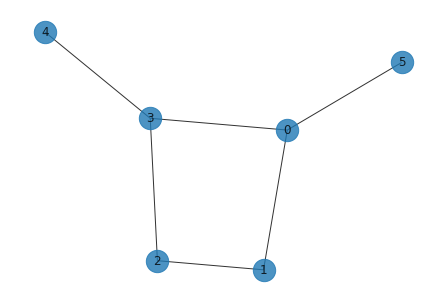

In [37]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (3, 4), (5, 0)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

This is an extension of the graph we have already seen, how would the the circuit need to be defined in order to solve a MaxCut problem?

In [ ]:
from qiskit import QuantumCircuit

def create_qaoa_circ(G, theta):
    '''
    Ex. Create a function so that it shows the circuit shown below taking as exmaple the function in the first notebook ( 1 - Solving problems.ipynb)
    '''
       
    # Number of nodes   
    nqubits = len(G.nodes())
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:1]
    gamma = theta[1:]
    
    ##########################
    
    #  Your code goes here   #
    
    ##########################
                   
    return qc

qc = create_qaoa_circ(G, [3.0, 3.0])
qc.draw('mpl')

![ex1](../assets/ex1.png)

What would the density matrix of this circuit look like after all?

In [40]:
import qiskit.quantum_info as qi

rho = qi.DensityMatrix.from_instruction(qc)
rho.draw('latex', prefix='\\rho = ')

<IPython.core.display.Latex object>

In order to get samples out of the circuit we will need to add some measurements to it.

In [ ]:
def with_measures(G, theta):
    # Call to the previous function
    qc = create_qaoa_circ(G, theta)

    # Add measures
    ##########################
    
    #  Your code goes here   #
    
    ##########################
    
    return qc

qc = with_measures(G, [3.0, 3.0])
qc.draw('mpl')

![ex2](../assets/ex2.png)

Run it on a local simulator so that we can check the output.

In [44]:
from qiskit import Aer
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')    
##########################
    
#  Your code goes here   #

##########################
plot_histogram(counts)

Let's calculate the expected value for each set of measurements we obtain.

In [46]:
def compute_expectation(counts, G):
    
    def maxcut_obj(x):

        obj = 0
        for i, j in G.edges():
            if x[i] != x[j]:
                obj -= 1
                
        return obj
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count

In [47]:
compute_expectation(counts, G)

-2.7177734375

In [48]:
def get_expectation(G, shots=512):
       
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots
    
    def execute_circ(theta):
        
        qc = with_measures(G, theta)
        counts = backend.run(qc, seed_simulator=10, nshots=512).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

Now run the optimization routine in order to obtain the optimal parameters for $\gamma$ and $\beta$.

In [49]:
from scipy.optimize import minimize

##########################
    
#  Your code goes here   #

##########################
res

     fun: -3.994140625
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 27
  status: 1
 success: True
       x: array([4.31099649, 3.53864168])

In [ ]:
qc = with_measures(G, res.x)
qc.draw('mpl')

![ex3](../assets/ex3.png)

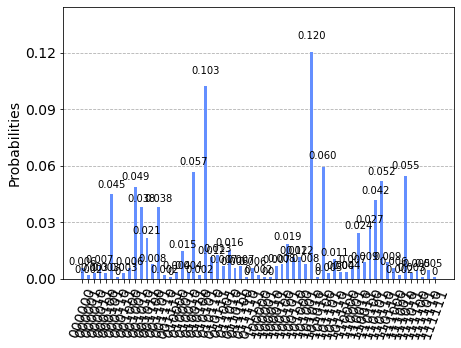

In [51]:
backend = Aer.get_backend('qasm_simulator')    
##########################
    
#  Your code goes here   #

##########################
plot_histogram(counts)

Compute the most probable solution and its associated probability.

In [52]:
max_count = 0
sum_count = 0
solution = ''

##########################
    
#  Your code goes here   #

##########################
    
print(f'Solution to our problem is {solution} with a success probability of being measure of {max_count/sum_count}')
    

Solution to our problem is 101010 with a success probability of being measure of 0.1201171875


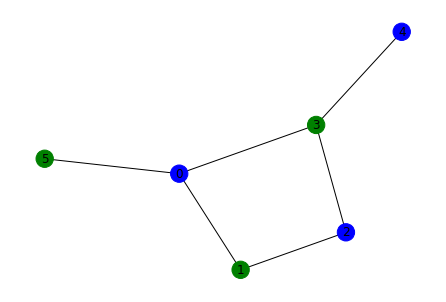

In [53]:
color_map = []
for color in solution:
    if color == '1':
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)

Lets now do the same with a real device (or at least its simulated version).

In [54]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
import os
from qiskit import IBMQ

# IBMQ.save_account(os.environ["TOKEN"])
IBMQ.load_account() # Load account from disk
IBMQ.providers()

Find the least busy device where our circuit could be run.

In [81]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.get_provider(hub=os.environ["HUB"])
device = least_busy(
    provider.backends(
        filters=lambda x: x.configuration().n_qubits >= .. # TODO: How many qubits are needed?
        and not x.configuration().simulator                # Not a simulator
        and x.status().operational == True                 # Operational backend
    )
)

In [ ]:
config = device.configuration()

# Basic Features
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
    "{4} OpenPulse programs. The basis gates supported on this device are {5}."
    "".format(config.backend_name,
            config.backend_version,
            config.n_qubits,
            '' if config.n_qubits == 1 else 's',
            'supports' if config.open_pulse else 'does not support',
            config.basis_gates))

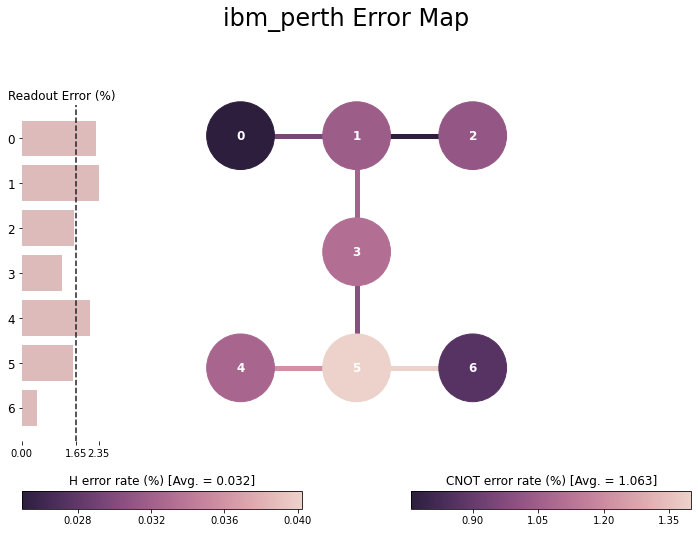

In [83]:
from qiskit.visualization import plot_error_map

plot_error_map(device)

Trasnpile the circuit to its maximum optimization level (https://qiskit.org/documentation/apidoc/transpiler.html).

In [ ]:
from qiskit import transpile

transpiled_circ = transpile(qc, device, optimization_level=...) # You can guess the optimization levels there are but better check the documentation, it often saves time 
transpiled_circ.draw('mpl', fold=100)

![transpiled](../assets/transpiled.png)

In [71]:
import warnings
warnings.filterwarnings("ignore")

Check the results of the run by simulating the device model locally.

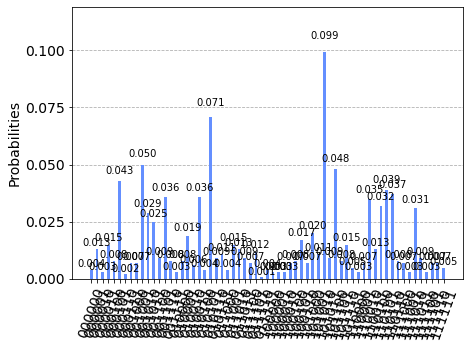

In [85]:
from qiskit.providers.aer import AerSimulator

sim = AerSimulator.from_backend(device)
##########################
    
#  Your code goes here   #

##########################
plot_histogram(counts)

In [86]:
max_count = 0
sum_count = 0
solution = ''

##########################
    
#  Your code goes here   #

##########################
    
print(f'Solution to our problem is {solution} with a success probability of being measure of {max_count/sum_count}')

Solution to our problem is 101010 with a success probability of being measure of 0.099


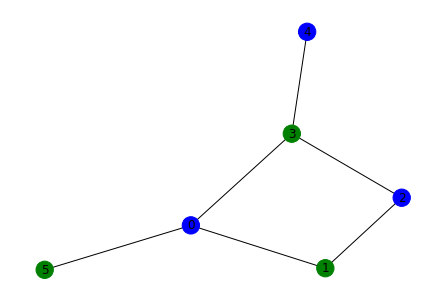

In [87]:
color_map = []
for color in solution:
    if color == '1':
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)

# Extra

Just to show what these levels os abstraction hide behind the curtains, the set of pulses that ultimatelly make the device behave as we would like to.

![stack](../assets/qiskit-stack.png)

In [ ]:
from qiskit import schedule as build_schedule

schedule = build_schedule(transpiled_circ, device)
schedule.draw()

![schedule](../assets/schedule.png)